# Workshop: Clustering and Classification with Python

The objective of this workshop is to introduce you to the basics of clustering and classification with Python. We will use the [scikit-learn](http://scikit-learn.org/stable/) library, which is a very popular library for machine learning in Python. We will also use the [pandas](http://pandas.pydata.org/) library for data manipulation and the [matplotlib](http://matplotlib.org/) library for plotting (seen in the previous workshop).


For this workshop, we will use the [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is a very famous data set in machine learning. It contains 150 samples of 3 different species of iris flowers (50 samples for each species). For each sample, 4 features are measured: the length and the width of the sepals and petals, in centimeters. The goal is to classify the samples into the 3 different species based on these 4 features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Exercise 1: Discovering the scikit-learn library

First of all, we will use the sklearn library to load the Iris data set, and use pandas to study it and plot it.

In [29]:
# Load the data 
from sklearn.datasets import load_iris

# Convert it to a pandas dataframe

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first 5 rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Exercise 2: Split the data set into a training set and a test set

To evaluate the performance of a classifier, we need to test it on data that it has never seen before. Therefore, we need to split the data set into a training set and a test set. We will use the training set to train the classifier, and the test set to evaluate its performance.

In [3]:
# Separate the data into a test and training set (70% training and 30% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, iris.target, test_size=0.3, random_state=0)

#### Exercise 3: Visualize the data set

Before training a classifier, it is always a good idea to visualize the data set. Many ways of visualizing the data set are possible, but we will use a scatter plot of the data points, where each data point is represented by a dot, and the x and y coordinates of the dot are the values of the first and second features of the data point. We will use the pandas library to do this.

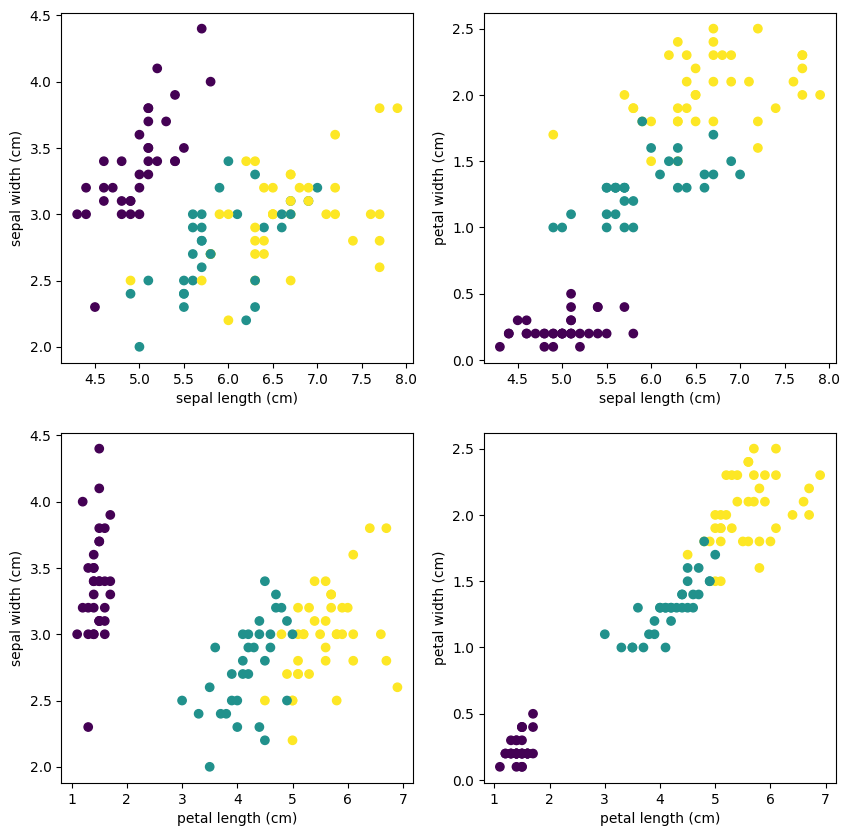

In [4]:
# Visualize the data

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
ax[0, 0].set_xlabel('sepal length (cm)')
ax[0, 0].set_ylabel('sepal width (cm)')

ax[1, 0].scatter(X_train['petal length (cm)'], X_train['sepal width (cm)'], c=y_train)
ax[1, 0].set_xlabel('petal length (cm)')
ax[1, 0].set_ylabel('sepal width (cm)')

ax[0, 1].scatter(X_train['sepal length (cm)'], X_train['petal width (cm)'], c=y_train)
ax[0, 1].set_xlabel('sepal length (cm)')
ax[0, 1].set_ylabel('petal width (cm)')

ax[1, 1].scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train)
ax[1, 1].set_xlabel('petal length (cm)')
ax[1, 1].set_ylabel('petal width (cm)')



plt.show()


Some questions need to be answered before studying the data set:

- How many features are there?
- What type of classification problem is this? (binary, multi-class, multi-label, ...)
- How many classes are there?
- Which features are the most discriminative? (i.e. which features allow to distinguish the different classes the best?)
- Are the classes linearly separable? (i.e. can we draw a straight line to separate the classes?)

#### Exercise 4: Identify the most discriminative features

We saw in the previous exercise that the features are not equally discriminative. Some features allow to distinguish the different classes better than others. Therefore, some features can be removed without affecting the performance of the classifier. This is called feature selection.

In order to select the most discriminative features, multiple methods exist. Create a feature ranking.

Use sklearn to do this.

In [48]:
# Establish which features are the most important

from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier(n_estimators=100, random_state=0)
ETC.fit(X_train, y_train)

# Rank the features in order of importance
importances = ETC.feature_importances_
indices = np.argsort(importances)[::-1]

print(indices)

# Print the feature ranking

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

[3 2 0 1]
Feature ranking:
1. petal width (cm) (0.425765)
2. petal length (cm) (0.415164)
3. sepal length (cm) (0.097072)
4. sepal width (cm) (0.061999)


#### Exercise 5: Train a supervised classifier

Now that we know which features are the most discriminative, we can train a classifier. As this dataset is a clustering problem, we will use a clustering algorithm.

In order to learn the different clustering algorithms, we will start by using a supervised classifier.

You can use any clustering supervised classifier you want. But I recommend using a K-Nearest Neighbors classifier. You can find the documentation [here](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

In [6]:
# Implement a KNN classifier, train it on the training set and print the accuracy score on the training set

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train[['petal length (cm)', 'petal width (cm)']], y_train)))

Accuracy on training set: 0.962


#### Exercise 6: Evaluate the performance of the classifier

Now that we have trained a classifier, we need to evaluate its performance. We will use the test set to do this. 

1. Predict the class of each sample in the test set.
2. Compare the predicted class with the true class of each sample in the test set. (use sklearn to do this)
3. Compute and plot the confusion matrix. (use sklearn to do this)

> A confusion matrix is a table that is often used to describe the performance of a classifier on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

Accuracy on test set: 0.978


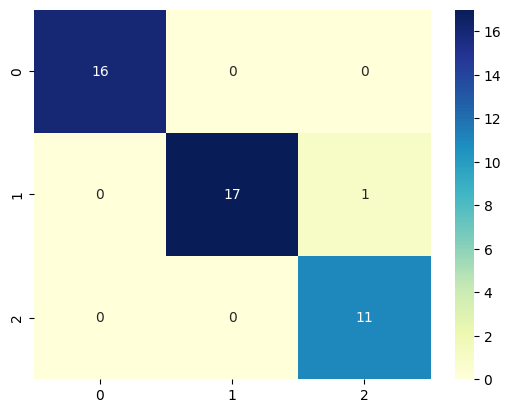

In [7]:
# Print the accuracy score on the test set

print("Accuracy on test set: {:.3f}".format(knn.score(X_test[['petal length (cm)', 'petal width (cm)']], y_test)))


# Print the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, knn.predict(X_test[['petal length (cm)', 'petal width (cm)']]))), annot=True, cmap="YlGnBu" ,fmt='g')
plt.show()

#### Exercise 7: Implement an unsupervised clustering algorithm

Now that we have trained a supervised classifier, we will train an unsupervised clustering algorithm. I suggest the K-Means algorithm. You can find the documentation [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

In [40]:
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters and fit it to the data

kmeans = KMeans(n_clusters=3, n_init="auto")

kmeans.fit(X_train[['petal length (cm)', 'petal width (cm)']])

KMTfounded_clusters = kmeans.predict(X_train[['petal length (cm)', 'petal width (cm)']])

from sklearn.metrics import accuracy_score

# Print the accuracy score on the test set

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_train, KMTfounded_clusters)))


Accuracy on training set: 0.952


In [47]:
from sklearn.metrics import accuracy_score

# Print the accuracy score on the test set

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, kmeans.predict(X_test[['petal length (cm)', 'petal width (cm)']]))))

Accuracy on test set: 0.933


#### Exercise 8: Evaluate the performance of the unsupervised clustering algorithm

Now that we have trained an unsupervised clustering algorithm, we need to evaluate its performance. As done previously, we will use the test set to do this.

In [9]:
# Print the accuracy score on the test set

founded_clusters = kmeans.predict(X_test[['petal length (cm)', 'petal width (cm)']])

good_predictions = 0

for i in range(len(y_test)):
    if y_test[i] == founded_clusters[i]:
        good_predictions += 1

print("Accuracy on test set: {:.3f}".format(good_predictions / len(y_test)))

Accuracy on test set: 0.400


#### Exercise 9: Plot each of the estimated clusters and the true clusters

Now that we have trained and testing both algorithm. We will plot the results of each algorithm and observe the differences, and try to explain the errors of each algorithm.

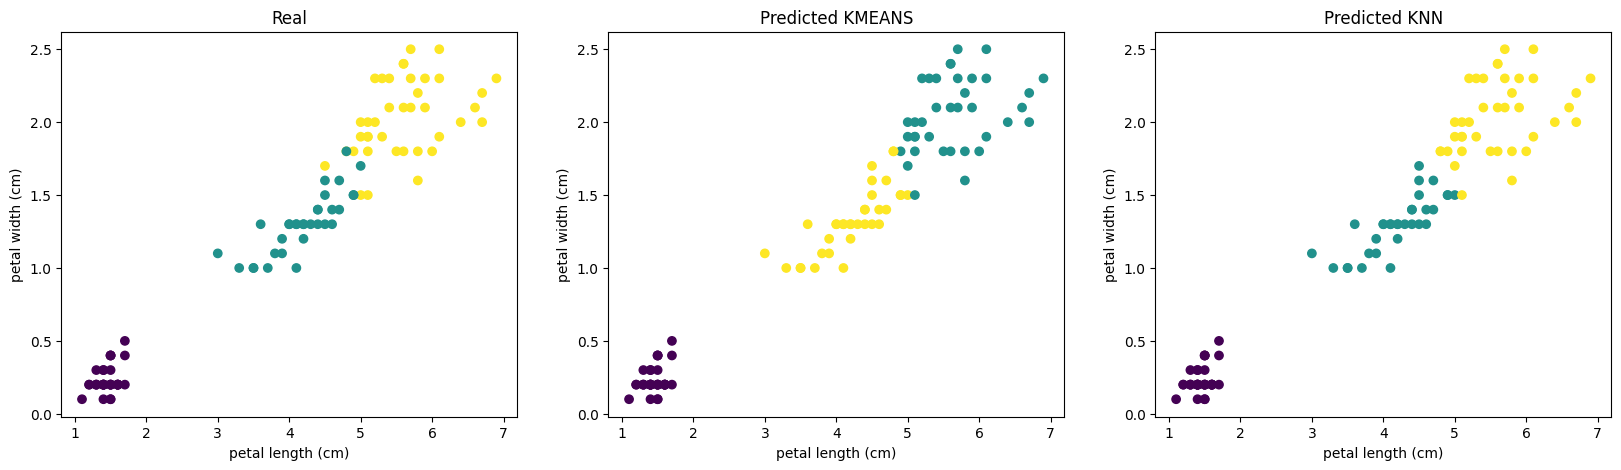

In [10]:

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train)
ax[0].set_xlabel('petal length (cm)')
ax[0].set_ylabel('petal width (cm)')
ax[0].set_title('Real')

ax[1].scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=KMTfounded_clusters)
ax[1].set_xlabel('petal length (cm)')
ax[1].set_ylabel('petal width (cm)')
ax[1].set_title('Predicted KMEANS')

ax[2].scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=knn.predict(X_train[['petal length (cm)', 'petal width (cm)']]))
ax[2].set_xlabel('petal length (cm)')
ax[2].set_ylabel('petal width (cm)')
ax[2].set_title('Predicted KNN')

plt.show()


Which algorithm do you think is the best for this dataset? Why?

# Challenge

Now that you have trained and tested both algorithms, you can try to improve the performance of the algorithms. You can try to improve the performance of the supervised classifier by changing the parameters of the classifier, or by using a different classifier. You can also try to improve the performance of the unsupervised clustering algorithm by changing the parameters of the algorithm, or by using a different algorithm.

It is also possible to improve the process to do a dimensionality reduction before training the classifier. You can try to do this.

# Conclusion

In this workshop, we have seen how to use the scikit-learn library to train a supervised and an unsupervised clustering algorithms. Clustering is a very important aspect of machine learning, and it is used in many applications. Such as image segmentation, document clustering, market segmentation, ...

# To go further

Multiple other clustering algorithms exist. You can try to use them and compare their performance. You can find a list of clustering algorithms [here](http://scikit-learn.org/stable/modules/clustering.html#clustering).